# Clasificador con regresión logística y mapa de la veta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler    

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm # para regresión logística con statsmodels


In [2]:
 sklearn.__version__,  sm.__version__

('0.23.2', '0.10.0')

In [3]:
data=pd.read_csv("/home/pi1grupo4/bmv100clean.csv")
data.head()

,XC,YC,ZC,NSAMP,NHOLES,PASS,DISTNEAR,ESTVAR,BE,CLASS_QP
0,128720.5,232510.10,3005.5,8.0,2.0,3.0,50.242311,0.394184,0.013384,2
1,128720.5,232510.15,3006.5,8.0,2.0,3.0,50.504265,0.396241,0.013369,2
2,128720.5,232510.25,3007.5,8.0,2.0,5.0,50.754825,204.990842,11.528859,2
3,128720.5,232510.25,3008.5,8.0,2.0,3.0,51.083045,0.399827,0.013313,2
4,128719.5,232510.00,3018.5,8.0,2.0,5.0,56.077945,204.990842,11.286284,2


In [4]:
data= data.drop(columns=['NHOLES'],axis=1) # Extrayendo NHoles


In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:, 8]

In [6]:
print(len(X),len(Y))

1196098 1196098


In [7]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=123) 

### Multitest

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2,random_state=123) 

### Set in values

In [9]:
X_train1Values=(X_train1.iloc[:,3:8]).values
X_test1Values=(X_test1.iloc[:,3:8]).values
y_train1Values=y_train1.values
y_test1Values=y_test1.values

In [10]:
scaler = StandardScaler()
scaler.fit(X_train1Values)
#Scale Data
X_trainScaled = scaler.transform(X_train1Values)
X_testScaled = scaler.transform(X_test1Values)

In [12]:
lm = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',penalty='none')
lm.fit(X_trainScaled,y_train1Values)

LogisticRegression(multi_class='multinomial', penalty='none',
                   solver='newton-cg')

### Prediction

In [13]:
y_pred1=lm.predict(X_testScaled)

### Accuracy

In [14]:
print('Accuracy Score:', metrics.accuracy_score(y_test1Values, y_pred1))  

Accuracy Score: 0.871773740848233


In [15]:
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1,digits=5))

[[36283  4636     0]
 [ 3839 57567  6227]
 [   72  6698 52132]]
              precision    recall  f1-score   support

           1    0.90270   0.88670   0.89463     40919
           2    0.83550   0.85117   0.84326     67633
           3    0.89330   0.88506   0.88916     58902

    accuracy                        0.87177    167454
   macro avg    0.87717   0.87431   0.87568    167454
weighted avg    0.87225   0.87177   0.87196    167454



In [16]:
list1 = y_pred1.tolist()

In [17]:
X_test1['Prediction_Logit']=list1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
X_test1.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,Prediction_Logit
96983,128893.5,232708.60,3236.5,16.0,2.0,8.696240,0.117413,0.005841,1
733667,129288.5,233095.25,2787.5,8.0,5.0,57.173550,353.709927,25.007620,2
1148127,129523.5,233227.40,3313.5,2.0,3.0,38.630053,0.445085,0.213044,2
984892,129422.5,233185.85,2448.5,8.0,5.0,85.460194,18.706500,1.378532,3
760126,129304.5,233065.85,3495.5,12.0,1.0,3.724562,0.085673,0.023939,1


### Dibujar la veta


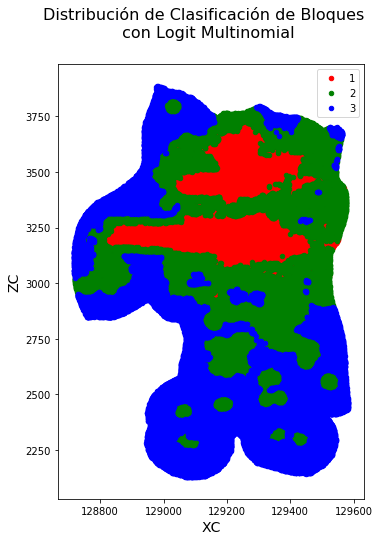

In [19]:
# Visualización de la Beta de la clasificación del Logit
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction_Logit')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques \n con Logit Multinomial", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
plt.show()

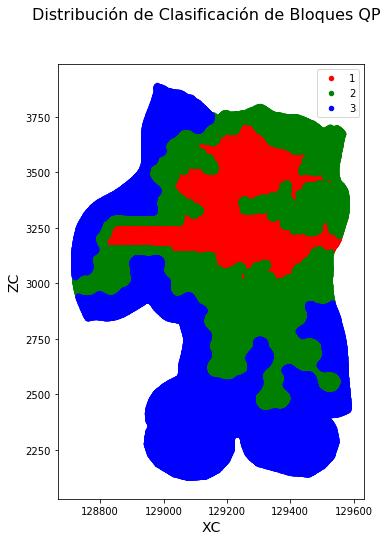

In [64]:
# Visualización de la veta de la clasificación del QP (Veta de referencia)
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = data.groupby('CLASS_QP')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques QP", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
plt.show()

# Estimación de los coeficientes del modelo con Statsmodels

In [100]:
X_train1sm=(X_train1.iloc[:,3:8])
X_test1sm=(X_test1.iloc[:,3:8])
y_train1sm=y_train1
y_test1sm=y_test1

In [107]:
X_trainScaledsm = scaler.transform(X_train1sm)
X_trainScaledsm1=pd.DataFrame(X_trainScaledsm)
X_trainScaledsm1.columns =['NSAMP', 'PASS', 'DISTNEAR', 'ESTVAR','BE']
X_trainScaledsm1.head()

,NSAMP,PASS,DISTNEAR,ESTVAR,BE
0,-0.149379,0.990062,-0.236838,6.259508,0.499500
1,0.966312,-0.413226,-0.891703,-0.341604,-0.219588
2,-0.428302,0.990062,1.725315,-0.204342,-0.050827
3,-0.149379,0.990062,-0.086657,6.150534,1.986220
4,-0.986147,-0.413226,-0.682508,-0.341078,-0.197558


In [118]:
logit_model=sm.MNLogit(y_train1sm,sm.add_constant(X_train1sm))
logit_model
result=logit_model.fit()
stats1=result.summary()
print(stats1)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.297057
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:               CLASS_QP   No. Observations:               669814
Model:                        MNLogit   Df Residuals:                   669802
Method:                           MLE   Df Model:                           10
Date:                Sun, 05 Jun 2022   Pseudo R-squ.:                  0.7245
Time:                        18:07:04   Log-Likelihood:            -1.9897e+05
converged:                       True   LL-Null:                   -7.2226e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
CLASS_QP=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5118      0.046   -140.941      0.000      -6.602      -6.421
NSAMP         -0.1167      0

In [ ]:
#Para verificar los cálculos en STATA
datos_stata= pd.concat([X_trainScaledsm1, y_train1sm], axis=1)
datos_stata.to_csv('datos_esc_log_stata.csv')

In [ ]:
# Visualización de la Beta de la clasificación del Logit
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction_Logit')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
plt.show()